# Marketing Lab (Clustering)

**Learning Objectives:**
  * Define and fit Clustering Algorithms
  * Gain exposure to marketing related DataSets

## Context of the Analysis

### Context- A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only  499 US Dollars ($999 on other days). It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
### Objective - The superstore wants to clasify customers based on existing data

### About this file
This data was gathered during last year's campaign.
#### Data description is as follows;

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* ID - Unique ID of each customer
* Year_Birth - Age of the customer
* Complain - 1 if the customer complained in the last 2 years
* Dt_Customer - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - the amount spent on fish products in the last 2 years
* MntMeatProducts - the amount spent on meat products in the last 2 years
* MntFruits - the amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - the amount spent on wine products in the last 2 years
* MntGoldProds - the amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through the company's website
* NumWebVisitsMonth - number of visits to company's website in the last month
* Recency - number of days since the last purchase

## 1. Library Import

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats
import warnings

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [4]:
Data=pd.read_csv("https://raw.githubusercontent.com/thousandoaks/Maths4DS-III/refs/heads/main/datasets/superstore_data.csv")


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
Data.sample(3).T

,2048,1999,1198
Id,7128,8162,3139
Year_Birth,1977,1956,1982
Education,PhD,Master,2n Cycle
Marital_Status,Single,Together,Single
Income,42997.0,14661.0,74116.0
Kidhome,1,0,0
Teenhome,1,0,0
Dt_Customer,7/12/2013,1/1/2013,12/30/2013
Recency,91,88,53
MntWines,4,4,871


## 3. Data Transformation

In [7]:
## We set date related columns as datetimes




In [8]:
# prompt: convert Year_Birth and Dt_Customer to datetimes

# Convert 'Year_Birth' to datetime, assuming it represents the year of birth
Data['Year_Birth'] = pd.to_datetime(Data['Year_Birth'], format='%Y', errors='coerce')

# Convert 'Dt_Customer' to datetime, assuming it's in a standard date format (you might need to adjust the format)
Data['Dt_Customer'] = pd.to_datetime(Data['Dt_Customer'], errors='coerce')


In [9]:
Data.sample(3).T

,165,1586,1914
Id,8151,6927,1440
Year_Birth,1990-01-01 00:00:00,1968-01-01 00:00:00,1978-01-01 00:00:00
Education,Basic,PhD,2n Cycle
Marital_Status,Married,Married,Together
Income,24279.0,44377.0,52513.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,2012-12-29 00:00:00,2012-05-10 00:00:00,2012-04-09 00:00:00
Recency,6,70,84
MntWines,16,224,367


In [10]:
## We remove customers being born before 1940 as they are probably ouliers

AgeFilter=Data['Year_Birth']>='1940-01-01'

In [11]:
Data[~AgeFilter]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,7,4,25,1,2,1,2,5,0,1


In [12]:
# We order the column Dt_Customer_New to determine who is the most recent customer, that defines the most recent date
Data['Dt_Customer'].sort_values()

,Dt_Customer
1509,2012-01-08
2222,2012-01-08
455,2012-01-08
1398,2012-01-08
2239,2012-01-09
...,...
667,2014-12-05
52,2014-12-05
434,2014-12-05
1569,2014-12-05


In [13]:
# We compute the number of days customers have been with the company based on the most recent date 2015-01-01
Data['TimeWithUs']=Data['Dt_Customer'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['MonthsWithUs']=Data['TimeWithUs']/np.timedelta64(30, "D")

In [14]:
## We compute the age of the customer based on the most recent date 2015-01-01

Data['Age']=Data['Year_Birth'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['AgeYears']=Data['Age']/np.timedelta64(365, "D")

In [15]:
SuperStore=Data[AgeFilter]
SuperStore.sample(3).T

,1130,481,511
Id,11096,5493,10560
Year_Birth,1952-01-01 00:00:00,1976-01-01 00:00:00,1980-01-01 00:00:00
Education,2n Cycle,Graduation,PhD
Marital_Status,Together,Married,Single
Income,57247.0,39356.0,36802.0
Kidhome,0,1,1
Teenhome,1,1,0
Dt_Customer,2013-08-08 00:00:00,2014-03-19 00:00:00,2014-06-16 00:00:00
Recency,50,21,23
MntWines,99,15,16


## 4. Let's try to classify customers (KMeans)


In [16]:
from sklearn.cluster import KMeans


import numpy as np

In [17]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [18]:
Features=['Education','Marital_Status','Income','Kidhome','Teenhome',  'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds',    'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases' ,'Response','Complain'    , 'MonthsWithUs','AgeYears']

In [19]:
X=SuperStore[Features]
X

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears
0,Graduation,Divorced,84835.0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,6.633333,45.030137
1,Graduation,Single,57091.0,0,0,464,5,64,7,0,37,1,7,3,7,1,0,6.666667,54.035616
2,Graduation,Married,67267.0,0,1,134,11,59,15,2,30,1,3,2,5,0,0,7.766667,57.038356
3,Graduation,Together,32474.0,1,1,10,0,1,0,0,0,1,1,0,2,0,0,1.900000,48.032877
4,Graduation,Single,21474.0,1,0,6,16,24,11,0,34,2,3,1,2,1,0,5.000000,26.016438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,372,18,126,47,48,78,2,5,2,11,0,0,18.233333,39.027397
2236,2n Cycle,Married,31056.0,1,0,5,10,13,3,8,16,1,1,0,3,0,0,23.633333,38.024658
2237,Graduation,Divorced,46310.0,1,0,185,2,88,15,5,14,2,6,1,5,0,0,34.166667,39.027397
2238,Graduation,Married,65819.0,0,0,267,38,701,149,165,63,1,5,4,10,0,0,25.433333,37.024658


In [20]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with 'object' dtype
categorical_features

Index(['Education', 'Marital_Status'], dtype='object')

In [21]:
from sklearn.preprocessing import OrdinalEncoder
# Create an OrdinalEncoder
enc = OrdinalEncoder()

# Fit and transform the categorical features
X[categorical_features] = enc.fit_transform(X[categorical_features])
X

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears
0,2.0,2.0,84835.0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,6.633333,45.030137
1,2.0,4.0,57091.0,0,0,464,5,64,7,0,37,1,7,3,7,1,0,6.666667,54.035616
2,2.0,3.0,67267.0,0,1,134,11,59,15,2,30,1,3,2,5,0,0,7.766667,57.038356
3,2.0,5.0,32474.0,1,1,10,0,1,0,0,0,1,1,0,2,0,0,1.900000,48.032877
4,2.0,4.0,21474.0,1,0,6,16,24,11,0,34,2,3,1,2,1,0,5.000000,26.016438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4.0,2.0,66476.0,0,1,372,18,126,47,48,78,2,5,2,11,0,0,18.233333,39.027397
2236,0.0,3.0,31056.0,1,0,5,10,13,3,8,16,1,1,0,3,0,0,23.633333,38.024658
2237,2.0,2.0,46310.0,1,0,185,2,88,15,5,14,2,6,1,5,0,0,34.166667,39.027397
2238,2.0,3.0,65819.0,0,0,267,38,701,149,165,63,1,5,4,10,0,0,25.433333,37.024658


In [22]:
enc.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object)]

In [23]:
# prompt: count rows in X having NaN

row_with_nan = X.isnull().any(axis=1).sum()
print(f"Number of rows with NaN values: {row_with_nan}")

Number of rows with NaN values: 24


In [24]:
# prompt: drop rows having NaN

X = X.dropna()

## 4.1. Select number of clusters

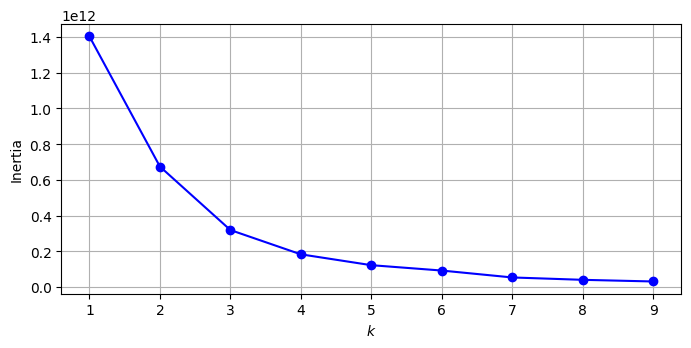

In [25]:


kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")


plt.grid()

plt.show()

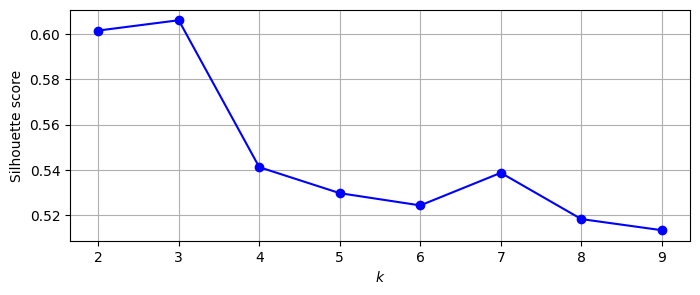

In [26]:
from sklearn.metrics import silhouette_score




silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
#plt.axis([1.0, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

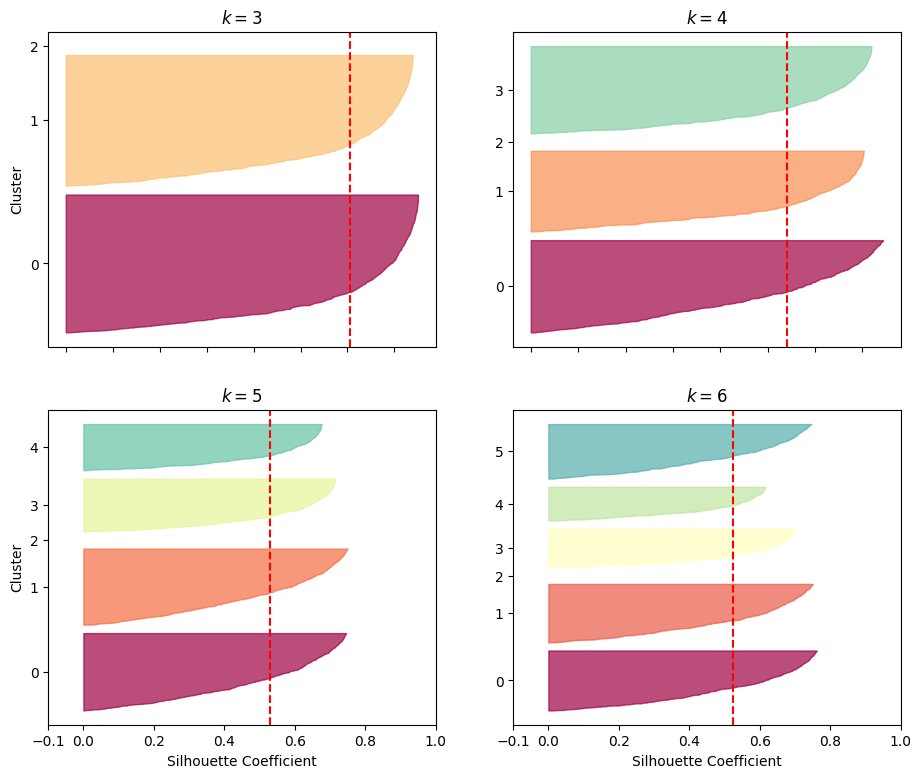

In [27]:


from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

### Based on the previous analysis we conclude that there are 3 categories of customers (3 clusters)

## 4.2. K-Means clustering (k=3)

In [28]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [29]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [30]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print('Labels',labels_unique)

number of estimated clusters : 3
Labels [0 1 2]


In [31]:
ClusterCenters=pd.DataFrame(kmeans.cluster_centers_)
ClusterCenters.columns=['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'Response', 'Complain', 'MonthsWithUs', 'AgeYears']

In [32]:
ClusterCenters

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears
0,2.506506,3.716543,70312.331784,0.152416,0.539033,544.069703,46.629182,304.881041,65.550186,47.768587,66.058550,2.229554,5.495353,4.591078,8.079926,0.189591,0.006506,17.916047,48.292013
1,2.290493,3.734155,34574.665493,0.715669,0.474472,79.117077,7.102113,36.459507,11.220951,7.419014,22.962148,2.414613,2.755282,0.854754,3.653169,0.113556,0.011444,17.959067,44.058014
2,2.000000,5.000000,666666.000000,1.000000,0.000000,9.000000,14.000000,18.000000,8.000000,1.000000,12.000000,4.000000,3.000000,1.000000,3.000000,0.000000,0.000000,23.133333,38.024658


In [33]:
# prompt: attach y_pred to X

# Add y_pred as a new column to X
X['y_pred'] = y_pred
X

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears,y_pred
0,2.0,2.0,84835.0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,6.633333,45.030137,0
1,2.0,4.0,57091.0,0,0,464,5,64,7,0,37,1,7,3,7,1,0,6.666667,54.035616,0
2,2.0,3.0,67267.0,0,1,134,11,59,15,2,30,1,3,2,5,0,0,7.766667,57.038356,0
3,2.0,5.0,32474.0,1,1,10,0,1,0,0,0,1,1,0,2,0,0,1.900000,48.032877,1
4,2.0,4.0,21474.0,1,0,6,16,24,11,0,34,2,3,1,2,1,0,5.000000,26.016438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4.0,2.0,66476.0,0,1,372,18,126,47,48,78,2,5,2,11,0,0,18.233333,39.027397,0
2236,0.0,3.0,31056.0,1,0,5,10,13,3,8,16,1,1,0,3,0,0,23.633333,38.024658,1
2237,2.0,2.0,46310.0,1,0,185,2,88,15,5,14,2,6,1,5,0,0,34.166667,39.027397,1
2238,2.0,3.0,65819.0,0,0,267,38,701,149,165,63,1,5,4,10,0,0,25.433333,37.024658,0


In [34]:
X.groupby('y_pred').count()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears
y_pred,,,,,,,,,,,,,,,,,,,
0,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076
1,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
kmeans.cluster_centers_

array([[2.50650558e+00, 3.71654275e+00, 7.03123318e+04, 1.52416357e-01,
        5.39033457e-01, 5.44069703e+02, 4.66291822e+01, 3.04881041e+02,
        6.55501859e+01, 4.77685874e+01, 6.60585502e+01, 2.22955390e+00,
        5.49535316e+00, 4.59107807e+00, 8.07992565e+00, 1.89591078e-01,
        6.50557621e-03, 1.79160471e+01, 4.82920125e+01],
       [2.29049296e+00, 3.73415493e+00, 3.45746655e+04, 7.15669014e-01,
        4.74471831e-01, 7.91170775e+01, 7.10211268e+00, 3.64595070e+01,
        1.12209507e+01, 7.41901408e+00, 2.29621479e+01, 2.41461268e+00,
        2.75528169e+00, 8.54753521e-01, 3.65316901e+00, 1.13556338e-01,
        1.14436620e-02, 1.79590669e+01, 4.40580142e+01],
       [2.00000000e+00, 5.00000000e+00, 6.66666000e+05, 1.00000000e+00,
        0.00000000e+00, 9.00000000e+00, 1.40000000e+01, 1.80000000e+01,
        8.00000000e+00, 1.00000000e+00, 1.20000000e+01, 4.00000000e+00,
        3.00000000e+00, 1.00000000e+00, 3.00000000e+00, 0.00000000e+00,
        0.00000000e+00

In [36]:
X.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Response', 'Complain', 'MonthsWithUs', 'AgeYears', 'y_pred'],
      dtype='object')

In [37]:
ClusterCenters=pd.DataFrame(kmeans.cluster_centers_)
ClusterCenters.columns=['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'Response', 'Complain', 'MonthsWithUs', 'AgeYears']

In [38]:
ClusterCenters

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears
0,2.506506,3.716543,70312.331784,0.152416,0.539033,544.069703,46.629182,304.881041,65.550186,47.768587,66.058550,2.229554,5.495353,4.591078,8.079926,0.189591,0.006506,17.916047,48.292013
1,2.290493,3.734155,34574.665493,0.715669,0.474472,79.117077,7.102113,36.459507,11.220951,7.419014,22.962148,2.414613,2.755282,0.854754,3.653169,0.113556,0.011444,17.959067,44.058014
2,2.000000,5.000000,666666.000000,1.000000,0.000000,9.000000,14.000000,18.000000,8.000000,1.000000,12.000000,4.000000,3.000000,1.000000,3.000000,0.000000,0.000000,23.133333,38.024658


In [39]:
enc.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object)]

### Based on the centroids of the clustering we observe three clusters of customers (0,1,2):

Cluster 0. Lower level of Education, lower level of Income, many kids, low spending on products (Wines, Fruits, Meat, Fish, Sweet, Gold), low web purchases, low catalog purchases, low store purchases, low response to offer, younger

Cluster 1. Higher level of Education, mid income, mid level of kids, higher level of teens, higher level of spending on products than cluster 0, high level of deal purcahses, high web purcases, mid catalog purchase, high stor purchase, low response to offer, older than other groups.

Cluster 2. High Level of Education, high income, low levels of kids and teens, high levels of spending on products, low level of deal purchases, high level of web purchases, high level of catalog purchases, high level of store purchase, high propensity to buy offers



In [40]:
import plotly.express as px
fig = px.parallel_coordinates(X[X['y_pred']==0])
fig.show()

In [41]:

fig = px.parallel_coordinates(X[X['y_pred']==1])
fig.show()

In [42]:

fig = px.parallel_coordinates(X[X['y_pred']==2])
fig.show()

## 5. Let's try to classify customers (DBSCAN)

In [43]:
from sklearn.cluster import DBSCAN

import numpy as np

In [44]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

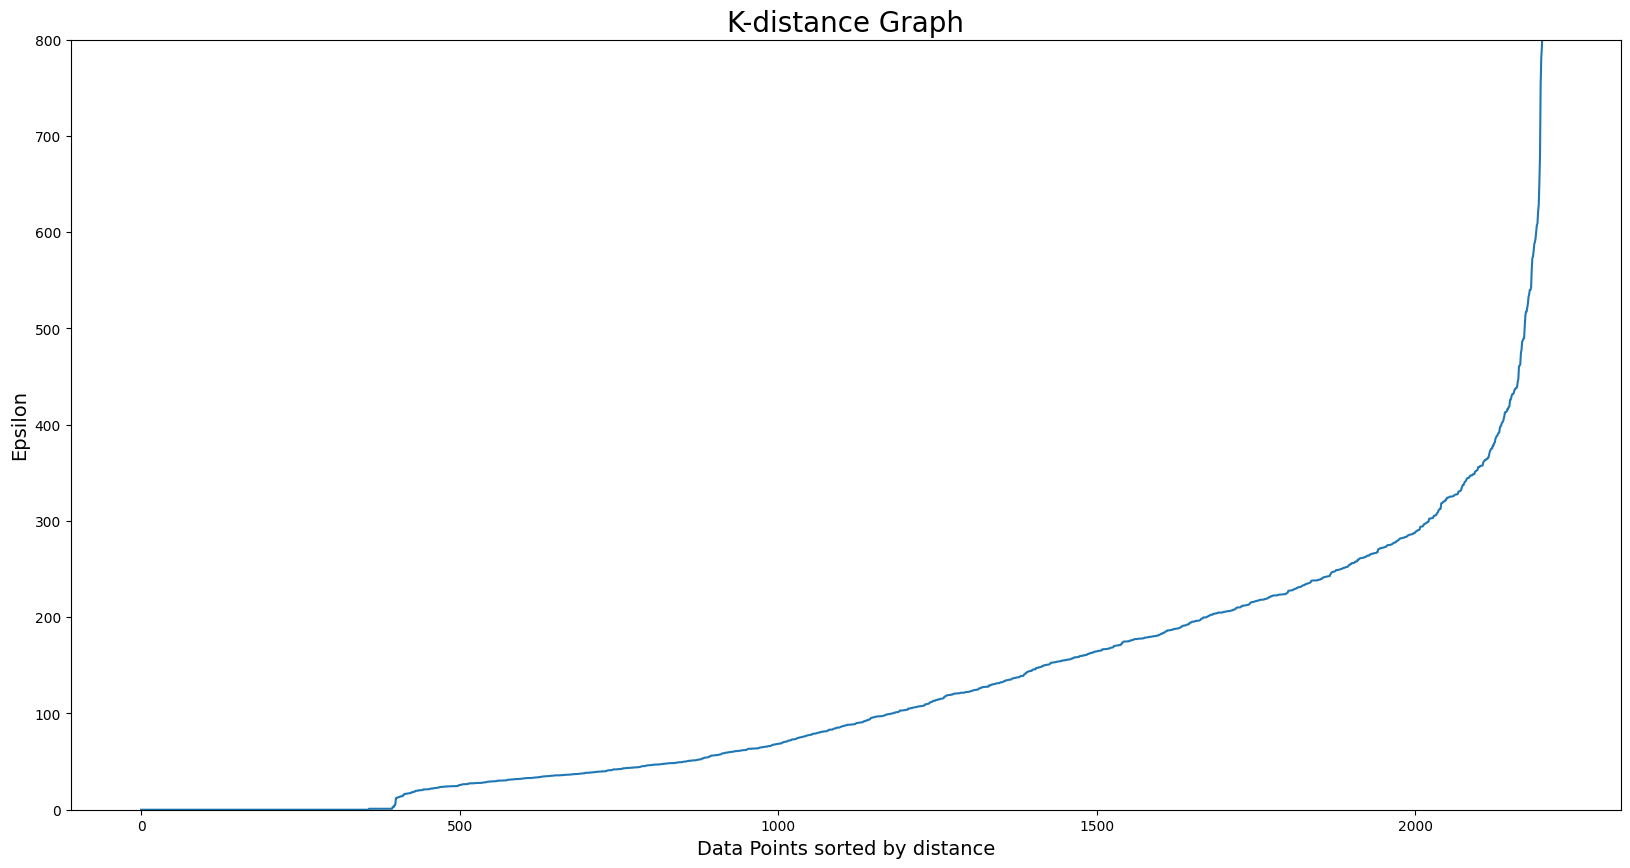

In [45]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.ylim(0, 800)  # Example: Set the y-axis range from 0 to 800
plt.show()

In [46]:
dbscan = DBSCAN(eps=800, min_samples=15)
y_pred=dbscan.fit_predict(X)


In [47]:
labels = dbscan.labels_
labels

array([ 0,  0,  0, ...,  0,  0, -1])

In [48]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print("number of labels :",labels_unique)

number of estimated clusters : 4
number of labels : [-1  0  1  2]


In [49]:
# Add y_pred as a new column to X
X['y_pred'] = y_pred
X

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears,y_pred
0,2.0,2.0,84835.0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,6.633333,45.030137,0
1,2.0,4.0,57091.0,0,0,464,5,64,7,0,37,1,7,3,7,1,0,6.666667,54.035616,0
2,2.0,3.0,67267.0,0,1,134,11,59,15,2,30,1,3,2,5,0,0,7.766667,57.038356,0
3,2.0,5.0,32474.0,1,1,10,0,1,0,0,0,1,1,0,2,0,0,1.900000,48.032877,0
4,2.0,4.0,21474.0,1,0,6,16,24,11,0,34,2,3,1,2,1,0,5.000000,26.016438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4.0,2.0,66476.0,0,1,372,18,126,47,48,78,2,5,2,11,0,0,18.233333,39.027397,0
2236,0.0,3.0,31056.0,1,0,5,10,13,3,8,16,1,1,0,3,0,0,23.633333,38.024658,0
2237,2.0,2.0,46310.0,1,0,185,2,88,15,5,14,2,6,1,5,0,0,34.166667,39.027397,0
2238,2.0,3.0,65819.0,0,0,267,38,701,149,165,63,1,5,4,10,0,0,25.433333,37.024658,0


In [50]:
X.groupby('y_pred').count()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears
y_pred,,,,,,,,,,,,,,,,,,,
-1,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
0,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072
1,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [51]:
ClusterCenters = X.groupby(labels).mean()

# If you want to reset the index to have cluster labels as a column:
ClusterCenters = ClusterCenters.reset_index().rename(columns={'index': 'Cluster'})

# Assign column names
ClusterCenters.columns = ['y_pred', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
                          'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                          'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                          'Response', 'Complain', 'MonthsWithUs', 'AgeYears','y_pred']

In [52]:
ClusterCenters

,y_pred,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,MonthsWithUs,AgeYears,y_pred
0,-1,2.351064,3.712766,82207.765957,0.223404,0.180851,556.244681,47.127660,437.638298,64.478723,...,50.968085,1.744681,4.574468,5.414894,5.946809,0.372340,0.000000,17.390071,42.773565,-1.0
1,0,2.401062,3.725869,50716.184846,0.457529,0.527992,291.522201,25.025579,150.125000,36.048745,...,43.235521,2.363417,4.059846,2.512066,5.792954,0.136100,0.009653,17.909009,46.346554,0.0
2,1,2.483871,3.774194,86113.645161,0.032258,0.096774,600.096774,59.258065,549.548387,77.838710,...,63.387097,1.096774,4.935484,6.032258,8.064516,0.451613,0.000000,18.408602,46.354132,1.0
3,2,1.750000,3.750000,7410.437500,0.500000,0.312500,23.812500,8.437500,15.937500,7.500000,...,52.250000,3.187500,3.187500,0.687500,2.187500,0.125000,0.000000,24.343750,35.148801,2.0


In [53]:
enc.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object)]

In [54]:
fig = px.parallel_coordinates(X[X['y_pred']==-1])
fig.show()

In [55]:
fig = px.parallel_coordinates(X[X['y_pred']==0])
fig.show()

In [56]:
fig = px.parallel_coordinates(X[X['y_pred']==1])
fig.show()

In [57]:
fig = px.parallel_coordinates(X[X['y_pred']==2])
fig.show()